In [1]:
### importing the libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [3]:
#loading the dataset
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

In [4]:
len(xtrain)

60000

In [5]:
xtrain[0].shape

(28, 28)

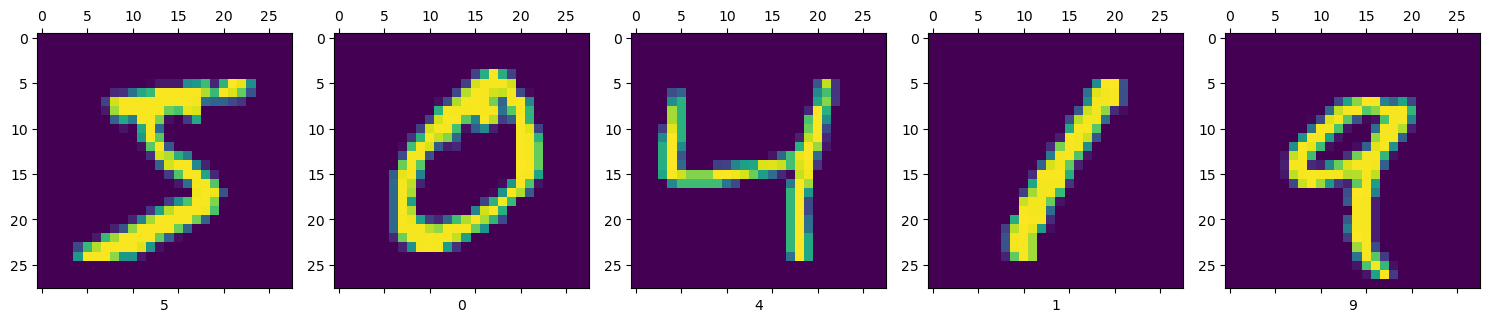

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    axes[i].matshow(xtrain[i])
    axes[i].set_xlabel(ytrain[i])

plt.tight_layout()
plt.show()

In [7]:
#reshaping the dataset
xtrain_flt = xtrain.reshape(len(xtrain), 28*28) # convert -> (60000,28,28) to (60000,784)
xtest_flt = xtest.reshape(len(xtest), 28*28)

In [8]:
print(xtrain_flt[0].shape)
print(xtest_flt[0].shape)

(784,)
(784,)


In [9]:
#builiding a model
model = keras.Sequential()

model.add(keras.layers.Dense(10, activation='sigmoid', input_shape=(784,)))

model.compile(
    optimizer='Adam', 
    loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
)

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-19 20:32:32.273675: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-02-19 20:32:32.273702: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-19 20:32:32.273706: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-02-19 20:32:32.273719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-19 20:32:32.273728: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Cr

In [10]:
import tensorflow as tf
from tensorflow import keras


# Define the model
model = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(784,))
])

# Compile the model
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

model.save("model.h5")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:

# from tensorflow.keras.utils import plot_model

# # Visualize and save model architecture
# plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)


In [14]:
import netron
netron.start("model.h5")

Serving 'model.h5' at http://localhost:8081


('localhost', 8081)

In [15]:
from tensorflow.keras.applications import VGG16

# Load VGG16 with pre-trained ImageNet weights
model = VGG16(weights='imagenet')  # Includes top layers (for classification)
model.save("model_16.h5")
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 873s 2us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
netron.start("model_16.h5")

Serving 'model_16.h5' at http://localhost:23007


('localhost', 23007)

In [28]:
model.fit(xtrain_flt, ytrain, epochs=5)

Epoch 1/5


2025-02-19 12:58:16.040346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7730 - loss: 16.2909
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8834 - loss: 5.8379
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8851 - loss: 5.5322
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8880 - loss: 5.2905
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8888 - loss: 5.3134


### scaling the xtrain between 0 and 1


In [29]:
xtrain_scaled = xtrain/255

In [30]:
xtest_scaled = xtest / 255

In [31]:
xtrain_scaled_flt = xtrain_scaled.reshape(len(xtrain_scaled), 28*28)

In [32]:
xtest_scaled_flt  = xtest_scaled.reshape(len(xtest_scaled), 28*28)

In [33]:
xtrain_scaled_flt.shape

(60000, 784)

In [34]:
xtrain_scaled_flt[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
mode_scaled = keras.Sequential()

mode_scaled.add(keras.layers.Dense(10, activation='sigmoid', input_shape=(784,)))

mode_scaled.compile(
    optimizer='Adam', 
    loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
)

In [36]:
mode_scaled.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
mode_scaled.fit(
    xtrain_scaled_flt, 
    ytrain, 
    epochs=5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8049 - loss: 0.7456
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9111 - loss: 0.3135
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9191 - loss: 0.2858
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9234 - loss: 0.2746
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9248 - loss: 0.2645


### performing testing of model

In [38]:
model.evaluate(xtest_flt, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8734 - loss: 6.3793


[5.796852111816406, 0.8877000212669373]

In [39]:
mode_scaled.evaluate(xtest_scaled_flt, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9109 - loss: 0.3072


[0.27095842361450195, 0.9236000180244446]

### conclusion -  scaling the input feature increase the accuracy and decresses the training time

### model prediction

In [40]:
x1 = xtest_flt[0]
x1_scld = xtest_scaled_flt[0]

print(f"the shape of x1 is : {x1.shape}")
print(f"the shape of x1_scld : {x1_scld.shape}")
x1=np.expand_dims(x1,axis=0)
x1_scld=np.expand_dims(x1_scld, axis=0)
print(f"the shape of x1 after dimension change is {x1.shape}")
print(f"the shape of x1_scld after dimension change is {x1_scld.shape}")


the shape of x1 is : (784,)
the shape of x1_scld : (784,)
the shape of x1 after dimension change is (1, 784)
the shape of x1_scld after dimension change is (1, 784)


In [41]:
print(f"the predicted value by first model is : {np.argmax(model.predict(x1))}")
print(f"the predicted value by second model is : {np.argmax(mode_scaled.predict(x1_scld))}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
the predicted value by first model is : 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
the predicted value by second model is : 7


In [42]:
y1 = ytest[0]
print(f"the actual value is : {y1}")

the actual value is : 7


In [48]:
for i in range(10):
    print("------------------------------------------------------------------------------------------------------------------------------------")
    y1 = ytest[i]
    x1 = xtest_flt[i]
    x1_scld = xtest_scaled_flt[i]
    print(f"{np.argmax(model.predict(np.expand_dims(x1, axis=0)))}, : , {np.argmax(mode_scaled.predict(np.expand_dims(x1_scld, axis=0)))}, : {y1}")
    print("------------------------------------------------------------------------------------------------------------------------------------")


------------------------------------------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3, : , 7, : 7
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
0, : , 2, : 2
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1, : , 1, : 1
----------------------------------------------------------------------

### hyper parameter tunning

In [49]:
### hyper parameter on number of nodes

In [50]:
import kerastuner as kt
from keras import Sequential
from keras.layers import Dense

/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_43061/1324204311.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [56]:
def build_model_get_no_of_nodes(hp):
    model = Sequential()

    units = hp.Int("units", 8, 128, step=8) #chenge nmber of nurons from 8 to 128 with step of 8

    model.add(Dense(units=units, activation='sigmoid', input_shape=(784,)))
    
    model.compile(optimizer= 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics=["accuracy"])

    return model

In [57]:
#creating a tunner object
tunner = kt.RandomSearch(build_model_get_no_of_nodes,
    objective = "accuracy", 
    max_trials = 5,
    directory = "no_of_nodes"
)

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
tunner.search(xtrain_flt, ytrain, epochs=5)

Trial 5 Complete [00h 00m 27s]
accuracy: 0.8838333487510681

Best accuracy So Far: 0.8838666677474976
Total elapsed time: 00h 02m 13s


In [ ]:
print(tunner.get_best_hyperparameters()[0].values)
model_optimzer = tunner.get_best_models(num_models=1)[0]

{'units': 120}

In [60]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,552 (92.00 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,702 (61.34 KB)

In [47]:
output = model.fit(xtrain_flt, ytrain, epochs=10, initial_epoch=6)

Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8876 - loss: 5.3442
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8870 - loss: 5.2480
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8920 - loss: 4.9513
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8898 - loss: 5.1235


### getting the right number of nodes

In [55]:
def buildmodel_node(hp):
    model  = Sequential()

    units = hp.Int("units", 8, 128, step=8) #chenge nmber of nurons from 8 to 128 with step of 8
    model.add(Dense(units=units, activation='sigmoid', input_shape=(784,)))
    model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])

    return model


In [56]:
#creating a tunner object
tunner_node = kt.RandomSearch(build_model,
    objective = "accuracy", 
    max_trials = 5,
    directory = "vivek_1"
)

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
tunner_node.search(xtrain_flt, ytrain, epochs=5)

Trial 4 Complete [00h 00m 23s]
accuracy: 0.8843833208084106

Best accuracy So Far: 0.8862166404724121
Total elapsed time: 00h 01m 42s
